In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
s_data= vacc_df[vacc_df['location']=='Saint Helena'].copy()
s_data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
20020,Saint Helena,SHN,2021-02-03,107.0,107.0,NaN,NaN,NaN,1.76,1.76,NaN,NaN
20021,Saint Helena,SHN,2021-02-04,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,12354.0
20022,Saint Helena,SHN,2021-02-05,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,12354.0
20023,Saint Helena,SHN,2021-02-06,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,12354.0
20024,Saint Helena,SHN,2021-02-07,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,12354.0


### ex 2: עבור איזו עמודה יש הכי הרבה נתונים חסרים? כמה נתונים חסרים יש עבור עמודה זו?

In [3]:
max_nan=s_data.isnull().sum().idxmax()
max_nan

'daily_vaccinations_raw'

In [4]:
s_data.isnull().sum().max()

92

### ex 3: הציגו רק את השורות שעבורן יש ערכים חסרים לעמודה vaccinations_daily

In [5]:
s_data.loc[s_data['daily_vaccinations'].isna()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
20020,Saint Helena,SHN,2021-02-03,107.0,107.0,NaN,NaN,NaN,1.76,1.76,NaN,NaN


### ex 4: מלאו ערכים חסרים עבור העמודה vaccinations_daily .הסבירו באיזו שיטה השתמשתם למלא את הערכים החסרים, ומדוע אתם חושבים שזו השיטה הנכונה לעמודה זו

In [6]:
s_data.daily_vaccinations.mean()

s_data['daily_vaccinations'].fillna(s_data['daily_vaccinations'].mean(), inplace=True)

### ex 5: total_vaccinations ול people_vaccinated :ל משותפת הסטוגרמה צ

,people_vaccinated,total_vaccinations
20020,107.0,107.0
20021,NaN,NaN
20022,NaN,NaN
20023,NaN,NaN
20024,NaN,NaN
...,...,...
20107,NaN,NaN
20108,NaN,NaN
20109,NaN,NaN
20110,NaN,NaN


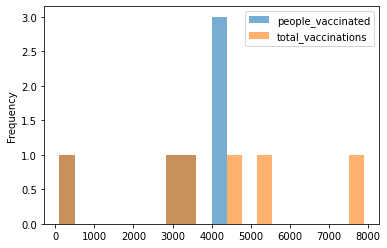

In [32]:
new= s_data[['people_vaccinated','total_vaccinations']]

new.plot.hist(bins=20, alpha=0.6)
new

### ex 6:

 הירוק הקו מהו בידקו. people_fully_vaccinated_per_hundred העמודה עבור boxplot צרו בתוך ה boxplot .האם הוא מתאים לחציון, ממוצע, שכיח או סטיית התקן של העמודה? 

<AxesSubplot:>

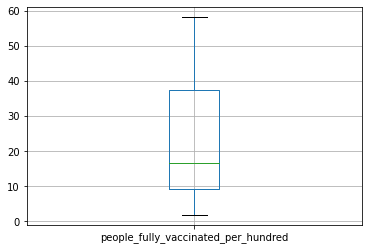

In [17]:
s_data.boxplot('people_fully_vaccinated_per_hundred') 
# הקו הירוק הוא חציון

### ex 7: הוסיפו עמודה month המייצגת את החודש עבור כל רשומה. הציגו את  הציגו, כלומר . החודשיים המקסימליים daily_vaccinations ואת people_vaccinated_per_hundred

In [24]:
from datetime import date
s_data['date'] = pd.to_datetime(s_data.date)
s_data['month'] = pd.DatetimeIndex(s_data.date).month
table= s_data.groupby('month')[['total_vaccinations_per_hundred', 'daily_vaccinations']].max()
table

,total_vaccinations_per_hundred,daily_vaccinations
month,,
2,1.76,84.813187
3,73.37,165.000000
4,88.50,97.000000
5,130.00,97.000000


### ex 8: מיינו את הנתונים שהצגתם בסעיף 7 לפיי undred_per_vaccinated_people כך שיוצגו מהערך הקטן ביותר לגדול ביותר ) במקרה והערכים שלכם כבר ממוינים כברירת מחדל, הציגו את הדרך בה יש למיין(. 

In [25]:
table.sort_values('total_vaccinations_per_hundred', ascending = True)

,total_vaccinations_per_hundred,daily_vaccinations
month,,
2,1.76,84.813187
3,73.37,165.000000
4,88.50,97.000000
5,130.00,97.000000
